In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score, make_scorer, roc_auc_score, accuracy_score, plot_roc_curve, f1_score, precision_score

In [2]:
#open data set
df = pd.read_csv('../data/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
#sum nan values
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


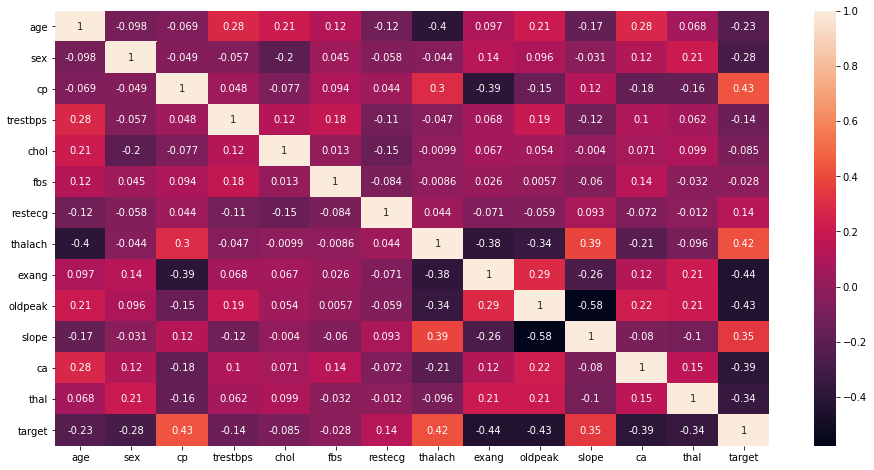

In [4]:
#show correlation table
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### On our target almost every parameter has influence

/home/vladimir/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


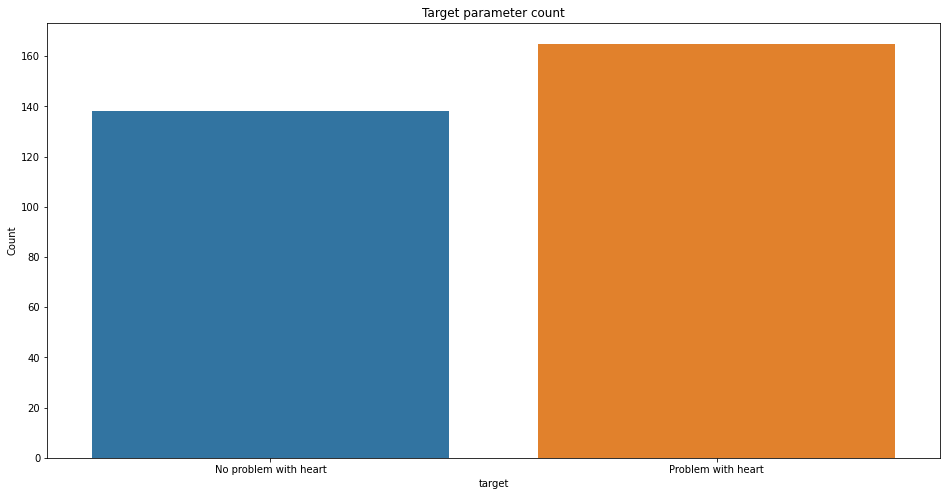

In [5]:
#show target count
plt.figure(figsize=(16, 8))
sns.countplot('target', data=df)
plt.xticks(ticks = [0, 1],labels=('No problem with heart', 'Problem with heart'))
plt.ylabel('Count')
plt.title('Target parameter count')
plt.show()

### Counts of our target values are almost the same

# Show our data set on scatter plot

     1 component  2 component  target
0       0.624111     2.321270       1
1      -0.455988    -0.957351       1
2      -1.828805     0.042885       1
3      -1.716006    -0.495337       1
4      -0.371356     0.301156       1
..           ...          ...     ...
298     1.146672    -0.519529       0
299    -0.708593    -1.045752       0
300     2.459005     0.478262       0
301     1.762755    -2.336816       0
302    -0.860057     1.068516       0

[303 rows x 3 columns]


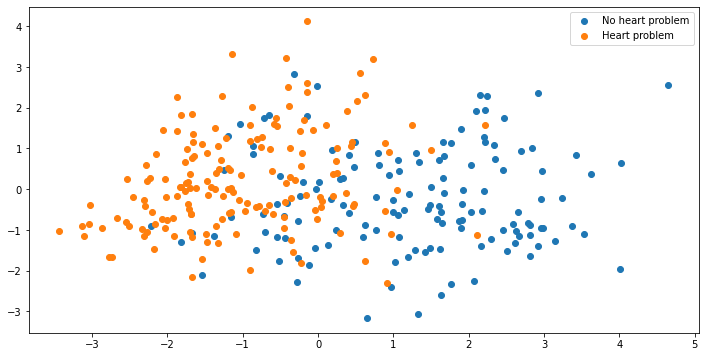

In [6]:
#show dataset
plt.figure(figsize=(12, 6))
pca = PCA(n_components=2)
scaler = StandardScaler()
x = df.drop('target', axis=1)
y = df['target']
x_norm = scaler.fit_transform(x)
x_pca = pca.fit_transform(x_norm)
df_pca = pd.DataFrame(data=x_pca, columns=['1 component', '2 component'])
df_pca['target'] = y
print(df_pca)
df_pca_heart_problem = df_pca[df_pca['target'] == 1]
df_pca_no_heart_problem = df_pca[df_pca['target'] == 0]
plt.scatter(df_pca_no_heart_problem.iloc[:, 0], df_pca_no_heart_problem.iloc[:, 1], label='No heart problem')
plt.scatter(df_pca_heart_problem.iloc[:, 0], df_pca_heart_problem.iloc[:, 1], label='Heart problem')
plt.legend()
plt.show()

# We use Support Vector Machine in order to predict heart disease
- We use GridSearch to find parameters and to check what parameters are the best for prediction

In [7]:
#create recall oriented support vector machine
pd.set_option('display.max_rows', 100)
scoring = {'Recall': make_scorer(recall_score), 'AUC': 'roc_auc'}
grid = GridSearchCV(SVC(), {'C': [1, 10, 20, 30, 40, 50, 100], 'kernel': ['linear', 'rbf'], 'gamma': [1, 10, 20, 30, 40, 50, 100]}, cv=5, scoring=scoring, refit='AUC')
grid.fit(x_norm, y)
grid_result = pd.DataFrame(grid.cv_results_)[['param_gamma', 'param_kernel', 'param_C', 'mean_test_Recall', 'mean_test_AUC']]
print(grid_result)
print(grid.best_params_)

   param_gamma param_kernel param_C  mean_test_Recall  mean_test_AUC
0            1       linear       1          0.890909       0.901387
1            1          rbf       1          0.969697       0.797419
2           10       linear       1          0.890909       0.901387
3           10          rbf       1          1.000000       0.704810
4           20       linear       1          0.890909       0.901387
5           20          rbf       1          1.000000       0.582592
6           30       linear       1          0.890909       0.901387
7           30          rbf       1          1.000000       0.552397
8           40       linear       1          0.890909       0.901387
9           40          rbf       1          1.000000       0.527273
10          50       linear       1          0.890909       0.901387
11          50          rbf       1          1.000000       0.518182
12         100       linear       1          0.890909       0.901387
13         100          rbf       

In [8]:
id_best_auc = grid_result['mean_test_AUC'].argmax()
id_best_recall = grid_result['mean_test_Recall'].argmax()
print(f"Top parameters for AUC are:\n{grid_result.iloc[id_best_auc]}")
print(f"Top parameters for Recall are:\n{grid_result.iloc[id_best_recall]}")

Top parameters for AUC are:
param_gamma                1
param_kernel          linear
param_C                    1
mean_test_Recall    0.890909
mean_test_AUC       0.901387
Name: 0, dtype: object
Top parameters for Recall are:
param_gamma              10
param_kernel            rbf
param_C                   1
mean_test_Recall          1
mean_test_AUC       0.70481
Name: 3, dtype: object


In [9]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Score evaluation in order to understand what parameters cope better

Train Score for  SVM Recall Oriented 1.0
Test Score for  SVM Recall Oriented 0.639344262295082
Recall Score for  SVM Recall Oriented 1.0
Precision Score for  SVM Recall Oriented 0.639344262295082 



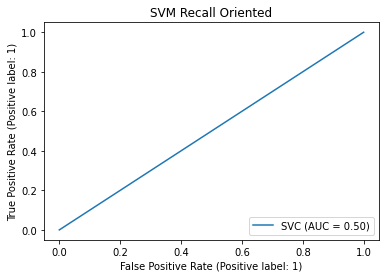

Train Score for  SVM with best params 0.8553719008264463
Test Score for  SVM with best params 0.8524590163934426
Recall Score for  SVM with best params 0.8717948717948718
Precision Score for  SVM with best params 0.8947368421052632 



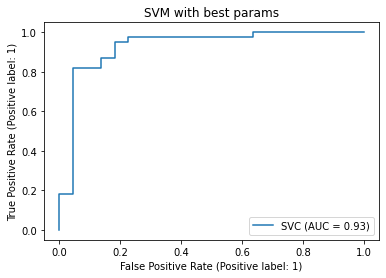

In [10]:
#Plot roc curve of the model
for i, model in enumerate(zip([SVC(C=1, gamma=10, kernel='rbf'), SVC(C=1, kernel='linear', gamma=1)], ['SVM Recall Oriented', 'SVM with best params'])):
    clf = model[0].fit(x_train, y_train)
    plot_roc_curve(clf, x_test, y_test)
    plt.title(model[1])
    print('Train Score for ', model[1], clf.score(x_train, y_train))
    print('Test Score for ', model[1], clf.score(x_test, y_test))
    print('Recall Score for ', model[1], recall_score(y_test, clf.predict(x_test)))
    print('Precision Score for ', model[1], precision_score(y_test, clf.predict(x_test)), '\n')
    plt.show()

# Support Vector Machine with linear kernel, c = 1 and gamma = 1 cope with prediction more better and is more suitable for prediction

# Show decision boundary of our Machines

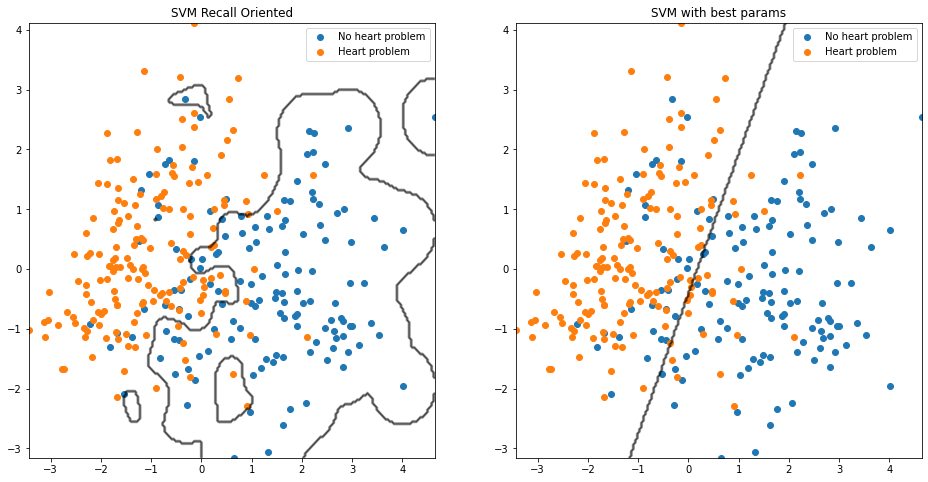

In [11]:
#Plot decision boundary
import numpy as np
plt.figure(figsize=(16, 8))
for i, model in enumerate(zip([SVC(C=1, gamma=10, kernel='rbf'), SVC(C=1, kernel='linear', gamma=1)], ['SVM Recall Oriented', 'SVM with best params'])):
    plt.subplot(1, 2, i+1)
    resolution = 200# 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(x_pca[:,0]), np.max(x_pca[:,0])
    X2d_ymin, X2d_ymax = np.min(x_pca[:,1]), np.max(x_pca[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))
    zz = model[0].fit(x_pca, y).predict(np.c_[xx.ravel(), yy.ravel()]).reshape((resolution, resolution))
    plt.title(model[1])
    plt.scatter(df_pca_no_heart_problem.iloc[:, 0], df_pca_no_heart_problem.iloc[:, 1], label='No heart problem')
    plt.scatter(df_pca_heart_problem.iloc[:, 0], df_pca_heart_problem.iloc[:, 1], label='Heart problem')
    plt.legend()
    plt.contour(xx, yy, zz, colors='black', alpha=0.2)
plt.show()

# Recall Oriented Support Vector Machine are more prone to overfitting and SVM with best parameters according to GridSearch is just right